In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import country_converter as coco

In [2]:
global_temp = pd.read_csv('Datasets/GlobalTemperatures.csv')

In [3]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# checking for duplication:

global_temp.duplicated().sum()

0

In [5]:
# checking data types:

global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [6]:
global_temp['dt'][0]

'1750-01-01'

In [7]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

In [8]:
global_temp['dt'].dtypes  # ns stands for nano-seconds

dtype('<M8[ns]')

In [9]:
type(global_temp['dt'][0])

pandas._libs.tslibs.timestamps.Timestamp

## problem statement:
- Does Global Warming Exists?

In [10]:
global_temp.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
global_temp = pd.read_csv('Datasets/GlobalTemperatures.csv', index_col='dt', parse_dates=True)

In [12]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Renaming the index column:

global_temp.index.rename('years', inplace=True)

In [14]:
data = global_temp.resample('A').mean()[['LandAverageTemperature', 'LandAverageTemperatureUncertainty']]

In [15]:
data['Uncertainty_top'] = data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']

In [16]:
data['Uncertainty_bottom'] = data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [17]:
data.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
years,,,,
1750-12-31,8.719364,2.637818,11.357182,6.081545
1751-12-31,7.976143,2.781143,10.757286,5.195000
1752-12-31,5.779833,2.977000,8.756833,2.802833
1753-12-31,8.388083,3.176000,11.564083,5.212083
1754-12-31,8.469333,3.494250,11.963583,4.975083


Text(0.5, 1.0, '')

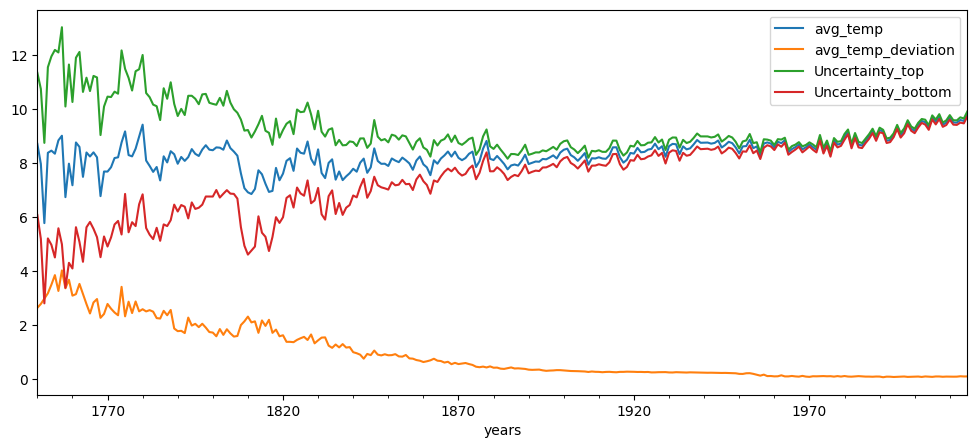

In [18]:
data['LandAverageTemperature'].plot(figsize=(12,5), label = 'avg_temp', legend=True)
data['LandAverageTemperatureUncertainty'].plot( label = 'avg_temp_deviation',legend=True)
data['Uncertainty_top'].plot( label = 'Uncertainty_top',legend=True)
data['Uncertainty_bottom'].plot(label = 'Uncertainty_bottom',legend=True)
plt.title('')

### Findings:
- From this chart we can see that Global Warming does exist because land average temperature is increasing since 1770,   especially the fastest tempreture growth have happened approximately from 1970 until 2015

#
___

## How does average temperature changes in each season?

In [19]:
global_temp.columns

Index(['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [20]:
global_temp = global_temp.reset_index()

In [21]:
global_temp.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Creating a month column:
global_temp['month'] = global_temp['years'].dt.month

In [23]:
global_temp['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
## a function to extract season from 'month'

def season(month):
    
    if month>=3 and month<=5:
        return 'spring'
    
    elif month>=6 and month<=8:
        return 'summer'
    
    elif month>=9 and month<=11:
        return 'fall'
    
    else:
        return 'winter'

In [25]:
# Creating a season column:
global_temp['season'] = global_temp['month'].apply(season)

In [26]:
global_temp.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,5,spring


In [27]:
years = global_temp['years'].dt.year.unique()

In [28]:
# Creating a new DataFrame to store all the "seasons temp"  of "various years":

spring_temps=[]
summer_temps=[]
fall_temps=[]
winter_temps=[]

for year in years:
    current_yr=global_temp[global_temp['years'].dt.year==year] # this will give us a dataframe of this year
    
    spring_temps.append(current_yr[current_yr['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_yr[current_yr['season']=='summer']['LandAverageTemperature'].mean())
    fall_temps.append(current_yr[current_yr['season']=='fall']['LandAverageTemperature'].mean())
    winter_temps.append(current_yr[current_yr['season']=='winter']['LandAverageTemperature'].mean())
    
seasons=pd.DataFrame({'years':years, 'spring_temps': spring_temps, 'summer_temps': summer_temps,
                    'fall_temps': fall_temps, 'winter_temps': winter_temps})

In [29]:
seasons.head()

,years,spring_temps,summer_temps,fall_temps,winter_temps
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


Text(0, 0.5, 'LandAverageTemperature')

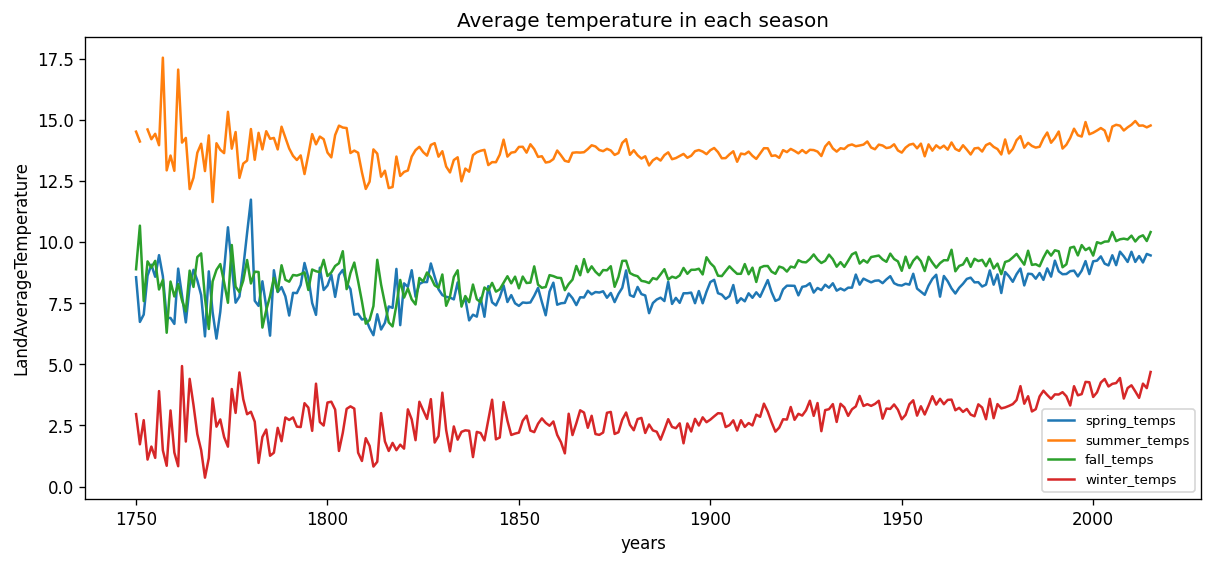

In [30]:
plt.figure(figsize=(12,5), dpi=120)
plt.plot(seasons['years'], seasons[['spring_temps','summer_temps','fall_temps', 'winter_temps']])
plt.legend(['spring_temps','summer_temps','fall_temps', 'winter_temps'], fontsize=8);
plt.title('Average temperature in each season')
plt.xlabel('years')
plt.ylabel('LandAverageTemperature')

### Findings:
- Based on this chart we can notice that average temperature is raising over the years across all years, spring season is usually the hottest season, then summer, followed by fall, and winter is the least hot season for earth temperature.

## What is the average temperatures in the various countries?

In [31]:
temp_country = pd.read_csv('Datasets/GlobalLandTemperaturesByCountry.csv')

In [32]:
temp_country.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland


In [33]:
temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [34]:
# checking for NaNs:
temp_country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [35]:
temp_country.dropna(inplace=True)

In [36]:
temp_country.duplicated().sum()

0

In [37]:
# checking country names as preparation for plotly maps
temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [38]:
# removing needless parts of country names:
temp_country['Country'] = temp_country['Country'].apply(lambda x: x.split('(')[0].strip())

In [39]:
temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
     

In [40]:
# Creating a new DataFrame to store the average tempretrure for each country
countries = temp_country['Country'].unique()
mean_temp = []
for country in countries:
    mean_temp.append(temp_country[temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())
    
countries_avg_temps = pd.DataFrame({'countries':countries, 'mean_temp':mean_temp})

In [41]:
countries_avg_temps.head(2)

,countries,mean_temp
0,Åland,5.291383
1,Afghanistan,14.045007


In [42]:
countries_names = countries_avg_temps['countries'].values.tolist()
cc = coco.CountryConverter()

iso_code = cc.convert(names = countries_names, to = 'ISO3')

Africa not found in regex
Asia not found in regex
Baker Island not found in regex
Europe not found in regex
Kingman Reef not found in regex
North America not found in regex
Oceania not found in regex
Palmyra Atoll not found in regex
South America not found in regex
Virgin Islands not found in regex


In [43]:
countries_avg_temps['iso_code'] = iso_code

In [44]:
countries_avg_temps

,countries,mean_temp,iso_code
0,Åland,5.291383,ALA
1,Afghanistan,14.045007,AFG
2,Africa,24.074203,not found
3,Albania,12.610646,ALB
4,Algeria,22.985112,DZA
...,...,...,...
232,Virgin Islands,26.336523,not found
233,Western Sahara,22.319818,ESH
234,Yemen,26.253597,YEM
235,Zambia,21.282956,ZMB


In [45]:
# Dropping rows with that are missing iso_code:
countries_avg_temps.drop(countries_avg_temps[countries_avg_temps['iso_code'] =='not found'].index, inplace=True)

In [46]:
countries_avg_temps

,countries,mean_temp,iso_code
0,Åland,5.291383,ALA
1,Afghanistan,14.045007,AFG
3,Albania,12.610646,ALB
4,Algeria,22.985112,DZA
5,American Samoa,26.611965,ASM
...,...,...,...
231,Vietnam,23.688366,VNM
233,Western Sahara,22.319818,ESH
234,Yemen,26.253597,YEM
235,Zambia,21.282956,ZMB


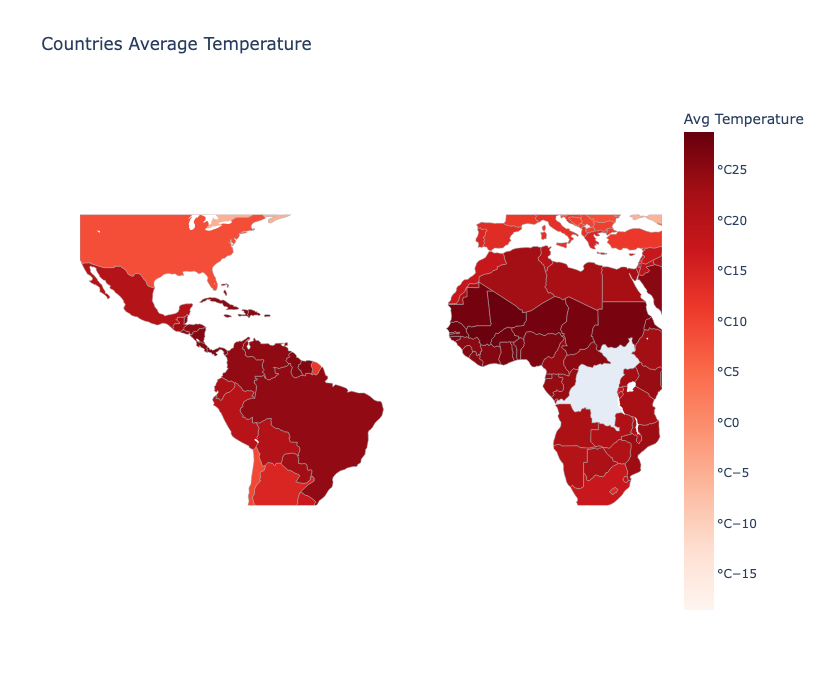

In [60]:
fig = go.Figure(data=go.Choropleth(
    locations= countries_avg_temps['iso_code'],
    z = countries_avg_temps['mean_temp'],
    text = countries_avg_temps['countries'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '°C',
    colorbar_title = 'Avg Temperature',   
))

fig.update_layout(
    title_text='Countries Average Temperature',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type = 'equirectangular'),
    width=1000,
    height=700,
)
fig.update_traces(colorbar_showticklabels= True)

fig.show()


<AxesSubplot: xlabel='countries'>

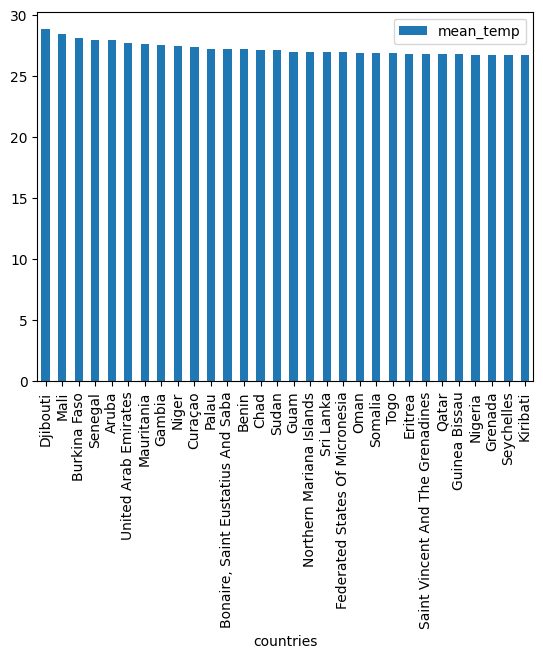

In [48]:
# highest countries in average tempreture
countries_avg_temps.sort_values(by='mean_temp', ascending=False).head(30)[['countries', 'mean_temp']].plot(x='countries',
                                                                                                          y='mean_temp',
                                                                                                          kind='bar')

<AxesSubplot: xlabel='countries'>

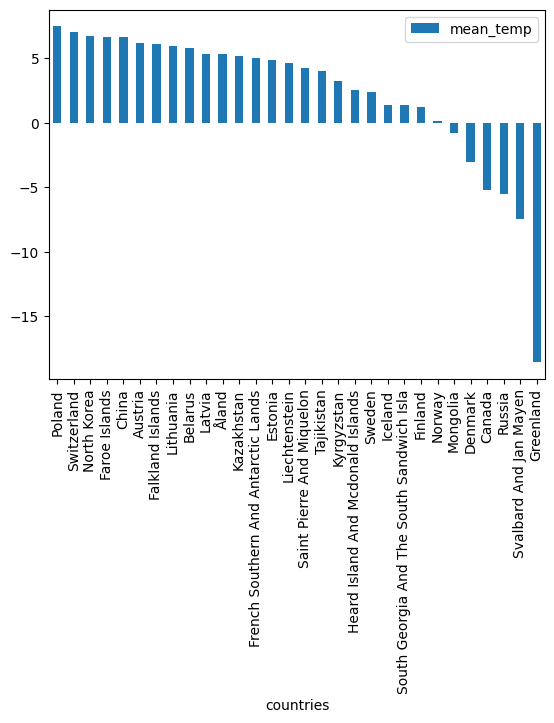

In [49]:
# highest countries in average tempreture
countries_avg_temps.sort_values(by='mean_temp', ascending=False).tail(30)[['countries', 'mean_temp']].plot(x='countries',
                                                                                                          y='mean_temp',
                                                                                                          kind='bar')

In [50]:
countries_avg_temps.sort_values(by='mean_temp', ascending=False).tail(30)['countries'].values

array(['Poland', 'Switzerland', 'North Korea', 'Faroe Islands', 'China',
       'Austria', 'Falkland Islands', 'Lithuania', 'Belarus', 'Latvia',
       'Åland', 'Kazakhstan', 'French Southern And Antarctic Lands',
       'Estonia', 'Liechtenstein', 'Saint Pierre And Miquelon',
       'Tajikistan', 'Kyrgyzstan', 'Heard Island And Mcdonald Islands',
       'Sweden', 'Iceland', 'South Georgia And The South Sandwich Isla',
       'Finland', 'Norway', 'Mongolia', 'Denmark', 'Canada', 'Russia',
       'Svalbard And Jan Mayen', 'Greenland'], dtype=object)

## Findings:
- We can notice that countries like ['Djibouti', 'Mali', 'Burkina Faso', 'Senegal', 'Aruba',
       'United Arab Emirates', 'Mauritania', 'Gambia', 'Niger'] has the heighest average tempreture, however countries like ['Poland', 'Switzerland', 'North Korea', 'Faroe Islands', 'China',
       'Austria', 'Falkland Islands', 'Lithuania', 'Belarus'] has the lowest average land tempreture.
       
- Based on my EDA, there's evidence in the data that global warming exist with an increasing trend since across the years from 1743 to 2013